# Problem 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ST(m,q):
    if m > q:
        return m-q
    elif m<-q:
        return m+q
    else:
        return 0.

In [3]:
# condition
A=np.array([[3,0.5], [0.5,1]])
mu = np.array([1.,2.])

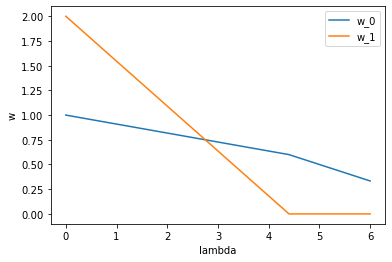

In [4]:
w_hat_lam = []
lams = np.arange(0, 6+0.1, 0.1)

gamma = np.linalg.eigvals(2*A).max()

for lamb in lams:
    ### implement PG ###
    w = np.random.rand(2)
    for i in range(100):
        m = w - 2./gamma*((w-mu) @ A)
        q = lamb/gamma
        w = np.array([ST(m[i], q) for i in range(2)])
    w_hat = w
    w_hat_lam.append(w_hat)
    ###

plt.plot(lams, w_hat_lam, label=['w_0','w_1'])
plt.xlabel('lambda')
plt.ylabel('w')
plt.legend()

In [5]:
print(f'lambda=2: {w_hat_lam[20]}')
print(f'lambda=4: {w_hat_lam[40]}')
print(f'lambda=6: {w_hat_lam[60]}')

lambda=2: [0.81818182 1.09090909]
lambda=4: [0.63636364 0.18181818]
lambda=6: [0.33333333 0.        ]


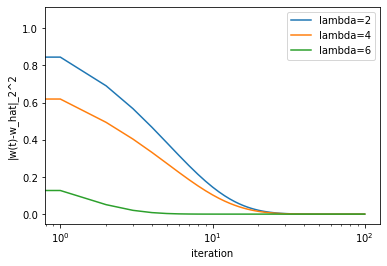

In [6]:

gamma = 10
for lamb in [2,4,6]:
    Ws=[]
    Ls=[]
    w = np.random.rand(2)
    L = (w-mu) @ A @ (w-mu) + lamb * np.linalg.norm(w, ord=1)
    Ws.append(w)
    for i in range(100):
        m = w - 2./gamma*((w-mu) @ A)
        q = lamb/gamma
        w = np.array([ST(m[i], q) for i in range(2)])
        L = (w-mu) @ A @ (w-mu) + lamb * np.linalg.norm(w, ord=1)
        Ls.append(L)
        Ws.append(w)
    Ws=np.array(Ws)
    minidx=np.argmin(Ls)
    plt.plot(np.linalg.norm(Ws-Ws[minidx], axis=1), label=f'lambda={lamb}')
plt.xlabel('iteration')
plt.ylabel('|w(t)-w_hat|_2^2')
plt.xscale('log')
plt.legend()
plt.show()